In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score

In [66]:
df=pd.read_csv('concrete_data.csv')

In [67]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [69]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [70]:
df.duplicated().sum()

25

In [71]:
# drop duplicates values
df.drop_duplicates()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [72]:
df.shape

(1030, 9)

In [73]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [74]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


train test split

In [75]:
x=df.iloc[: , : -1]
y=df.iloc[: , -1: ]

In [76]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [77]:
y

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.2, random_state=42)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(824, 8)
(206, 8)
(824, 1)
(206, 1)


# before transformer

PDF and QQ-Plot of each columns

C:\Users\Asus\AppData\Local\Temp\ipykernel_16144\4061148560.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[cols])
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: Future

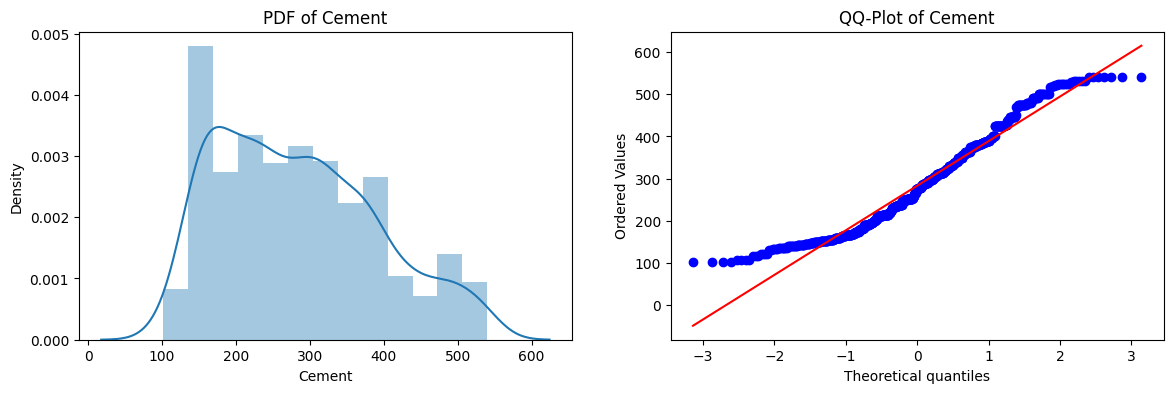

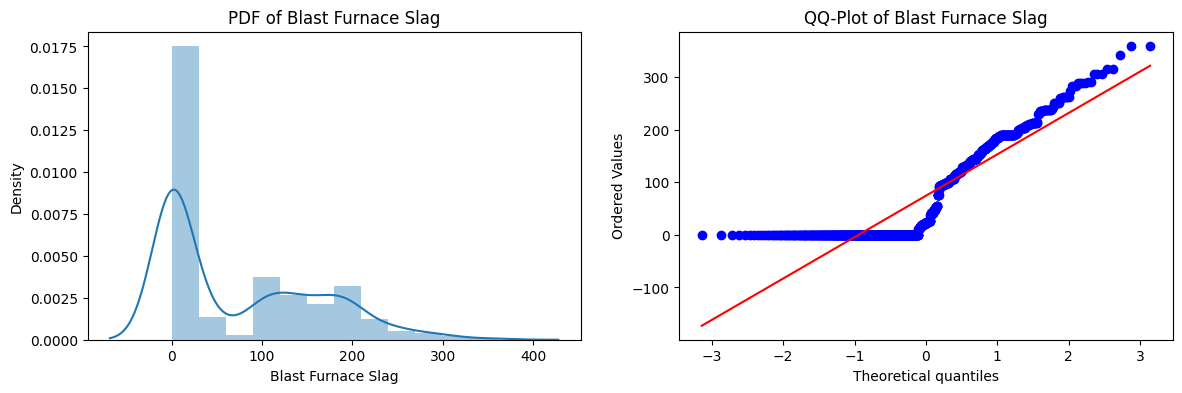

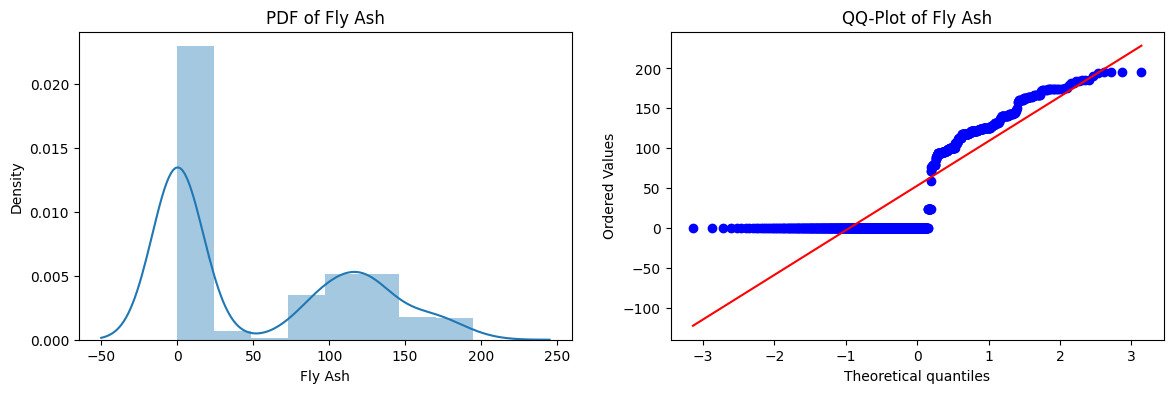

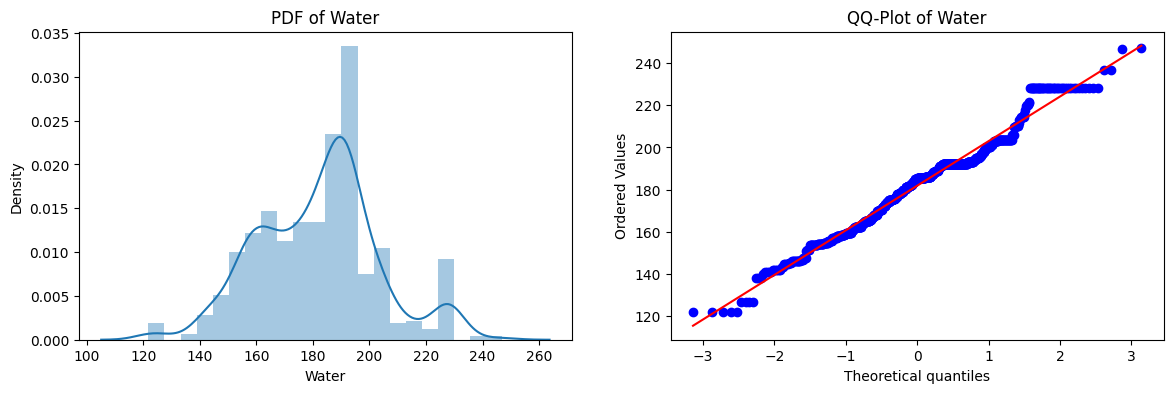

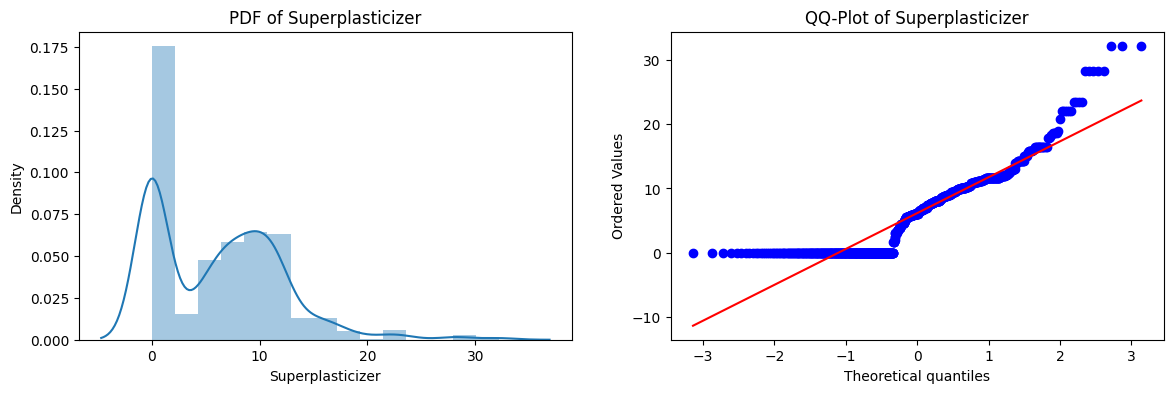

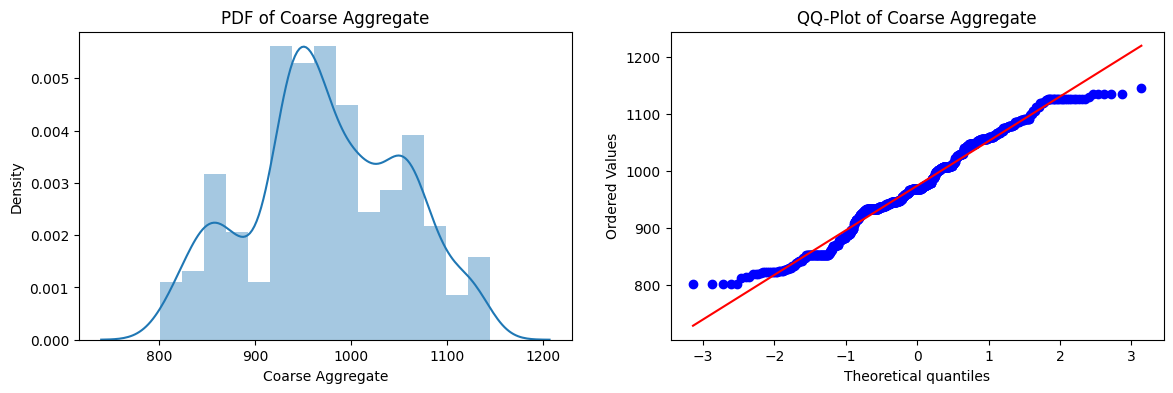

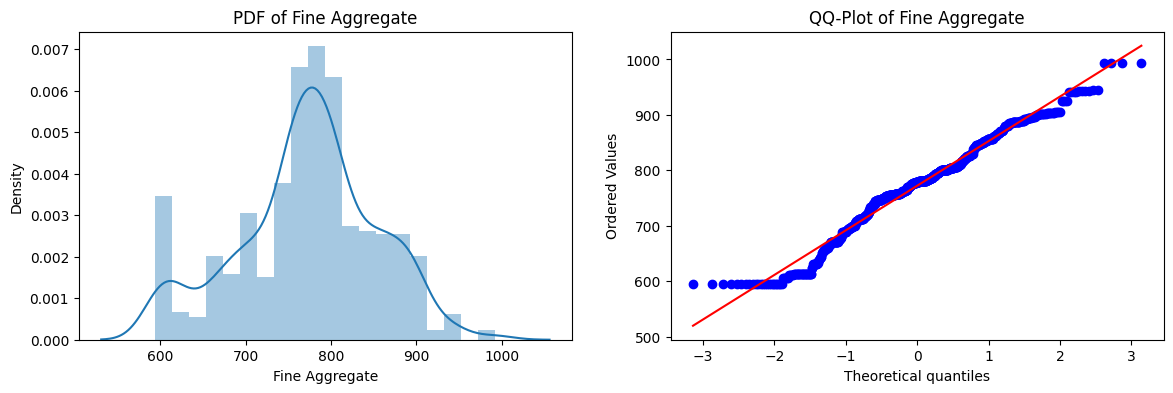

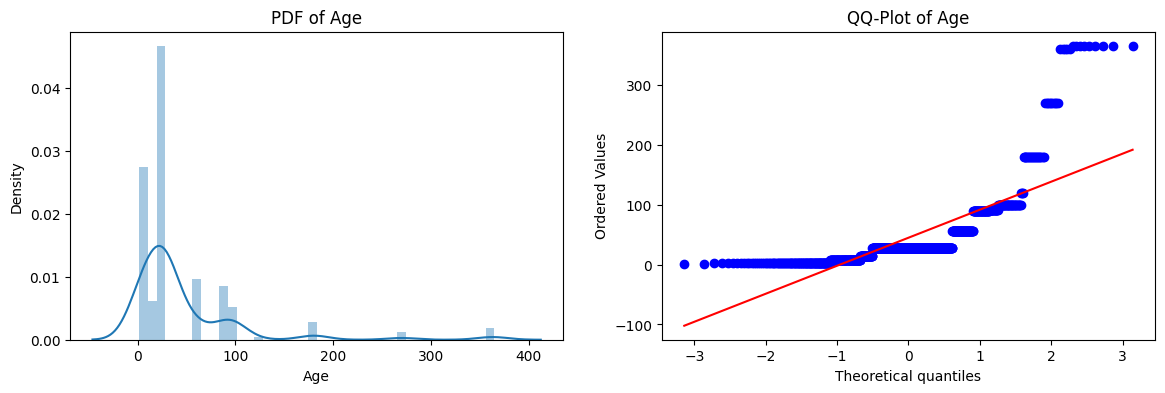

In [80]:
for cols in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[cols])
    plt.title(f"PDF of {cols}")

    plt.subplot(122)
    scipy.stats.probplot(x_train[cols], dist='norm' ,plot=plt)
    plt.title(f"QQ-Plot of {cols}")

In [81]:
r1=LinearRegression()
r2=DecisionTreeRegressor()
r1.fit(x_train,y_train)
r2.fit(x_train,y_train)

y_pred1=r1.predict(x_test)
y_pred2=r2.predict(x_test)

In [82]:
print(r2_score(y_test,y_pred1))
print(r2_score(y_test,y_pred2))

0.6275531792314848
0.829256889805164


# after transformer

# box cox (only applicable of positive value)

In [83]:
ptrf=PowerTransformer(method='box-cox')
# fit and transform 
x_train_trans=ptrf.fit_transform(x_train+.0001)
x_test_trans=ptrf.fit_transform(x_test+.0001)

lambdas value of each column decided by box cox 

In [84]:
pd.DataFrame({'cols':x_train.columns,'Box_Cox_lambdas':ptrf.lambdas_})

,cols,Box_Cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.032321
2,Fly Ash,-0.008968
3,Water,0.959062
4,Superplasticizer,0.140933
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014697


In [85]:
x_train_trans

array([[-1.27975148,  0.96644779,  1.12841263, ..., -0.26250009,
        -0.67756847,  0.10600976],
       [ 1.24470597,  0.63528217,  1.14105936, ..., -1.91272789,
        -0.3140622 ,  0.10600976],
       [ 0.07984235, -1.08340261,  1.13287576, ...,  1.01840672,
         0.02595743, -1.67596904],
       ...,
       [-0.84451728, -1.08340261,  1.13589302, ...,  1.34536665,
         0.29715693,  1.24673453],
       [ 1.56562352,  0.92630558, -0.88709068, ..., -1.53725479,
         0.0762111 ,  0.10600976],
       [ 0.42655631, -1.08340261,  1.12583766, ..., -0.62083415,
         0.0951082 ,  0.10600976]])

In [86]:
x_test_trans

array([[ 0.06067732,  0.92149134, -0.98029952, ..., -0.52587939,
        -1.3959162 ,  2.19054111],
       [ 1.00897123,  1.01264117, -0.98029952, ..., -0.35483481,
        -0.35659541, -1.00885623],
       [ 1.24047558,  1.01264117, -0.98029952, ..., -0.35483481,
        -0.35659541,  0.13409412],
       ...,
       [ 0.28009184,  1.02375141, -0.98029952, ...,  0.45779977,
         0.27655799, -1.00885623],
       [ 1.51241695,  0.63497393,  1.03939384, ..., -1.98806303,
        -0.43068958,  0.69689892],
       [ 0.79754993, -1.08618499, -0.98029952, ..., -0.0398796 ,
        -0.02821733,  1.07884614]])

converting into again in dataframe

In [87]:
x_train_trans=pd.DataFrame(x_train_trans,columns=x_train.columns)
x_test_trans=pd.DataFrame(x_test_trans,columns=x_train.columns)

PDF and QQ-Plot of each column

C:\Users\Asus\AppData\Local\Temp\ipykernel_16144\3323870147.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trans[cols])
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: 

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\AppData\Local\Temp\ipykernel_16144\3323870147.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level fun

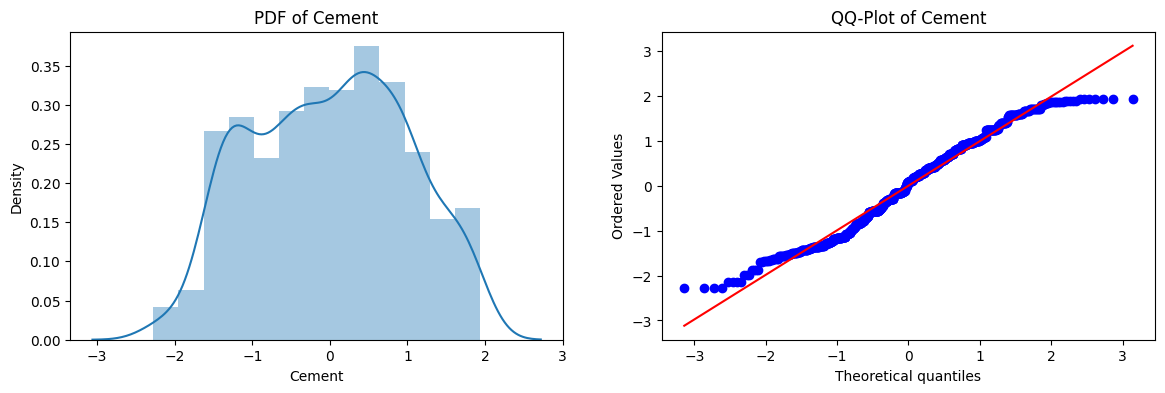

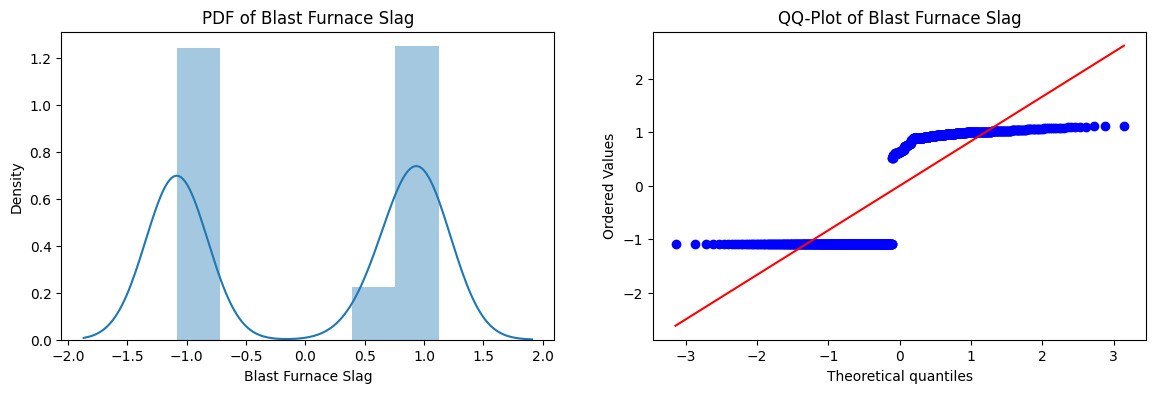

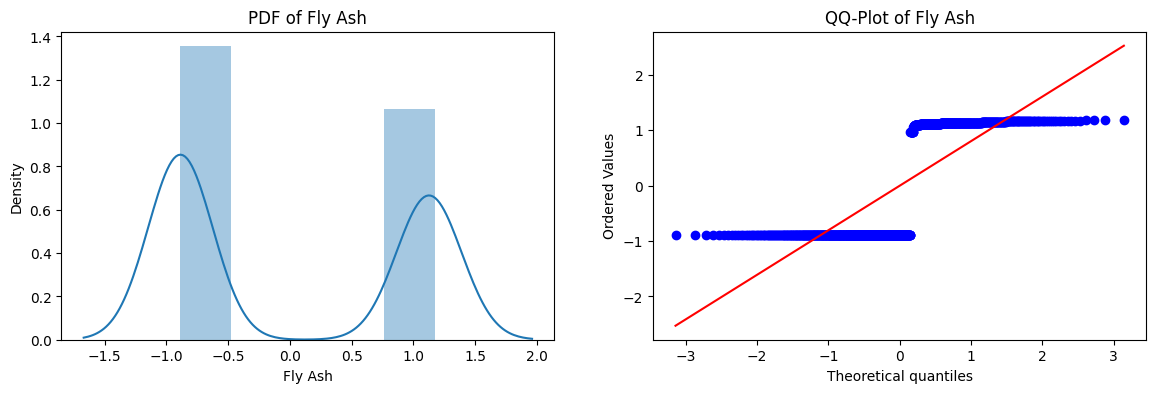

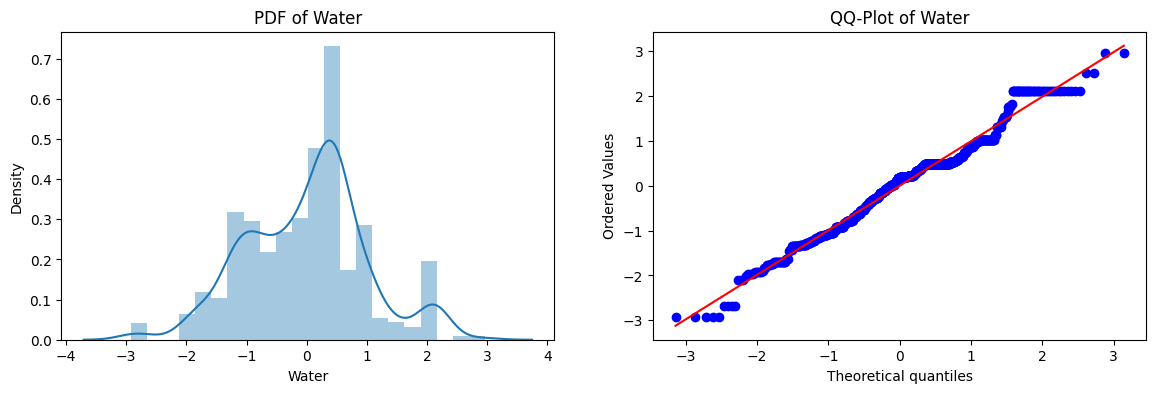

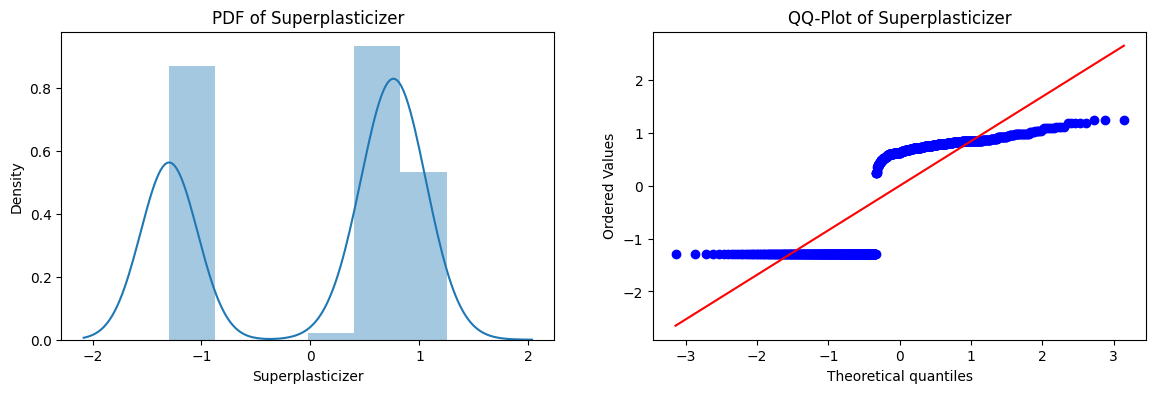

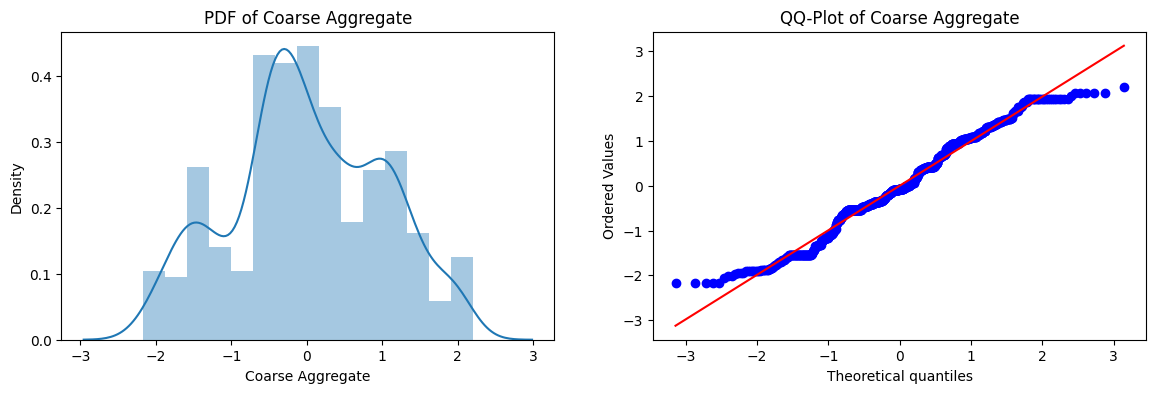

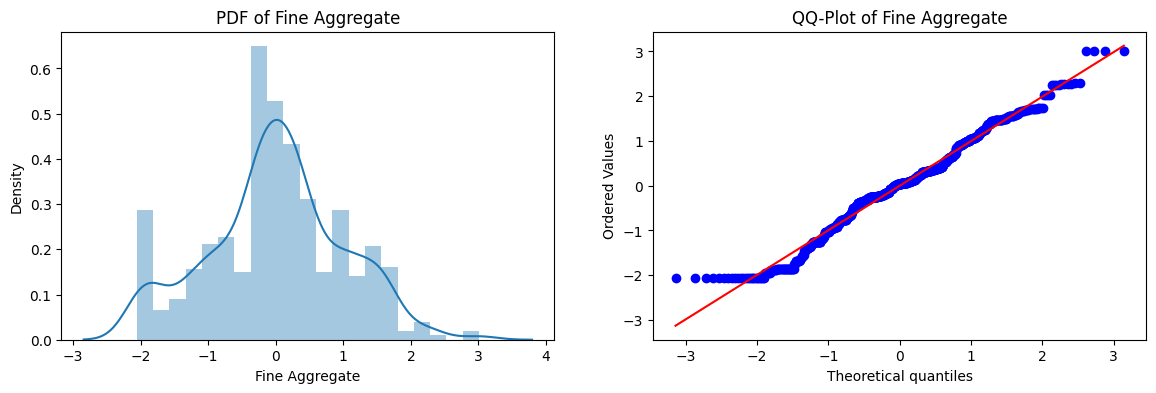

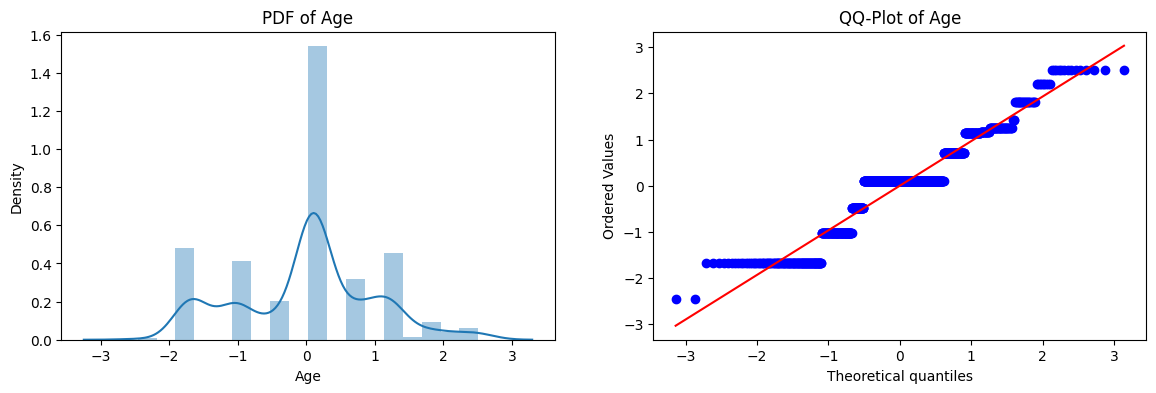

In [88]:
for cols in x_train_trans.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train_trans[cols])
    plt.title(f"PDF of {cols}")

    plt.subplot(122)
    scipy.stats.probplot(x_train_trans[cols], dist='norm' ,plot=plt)
    plt.title(f"QQ-Plot of {cols}")

In [89]:
r3=LinearRegression()
r4=DecisionTreeRegressor()
r3.fit(x_train_trans,y_train)
r4.fit(x_train_trans,y_train)

y_pred3=r3.predict(x_test_trans)
y_pred4=r4.predict(x_test_trans)

In [90]:
print(r2_score(y_test,y_pred3))
print(r2_score(y_test,y_pred4))

0.8069432947853531
0.7602987250769581


qq plot before and after box cox transformation

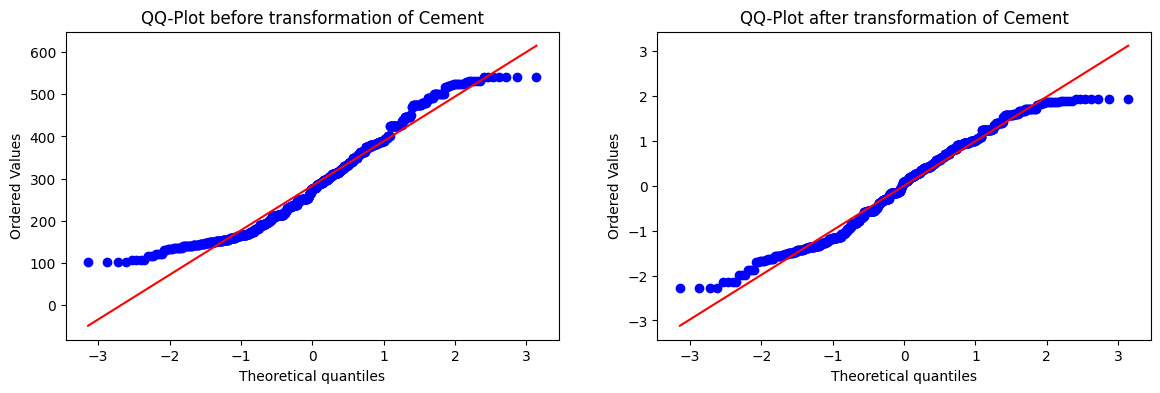

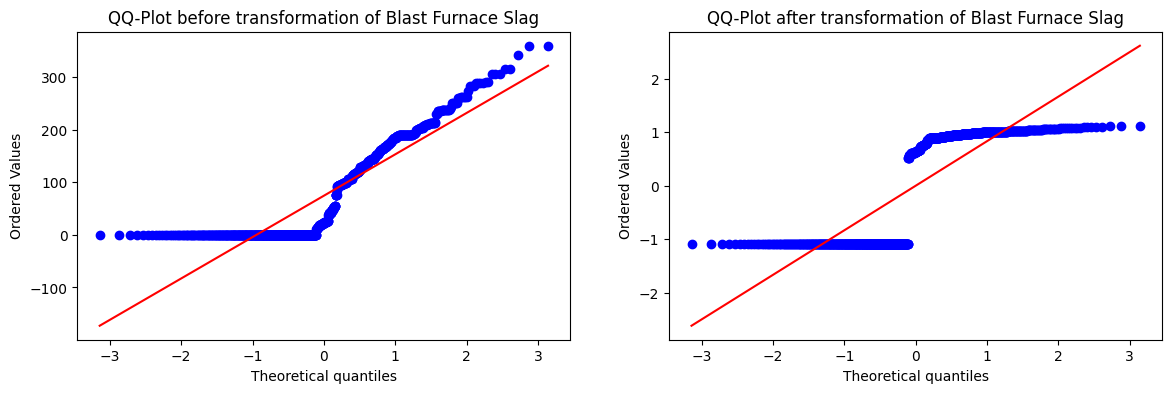

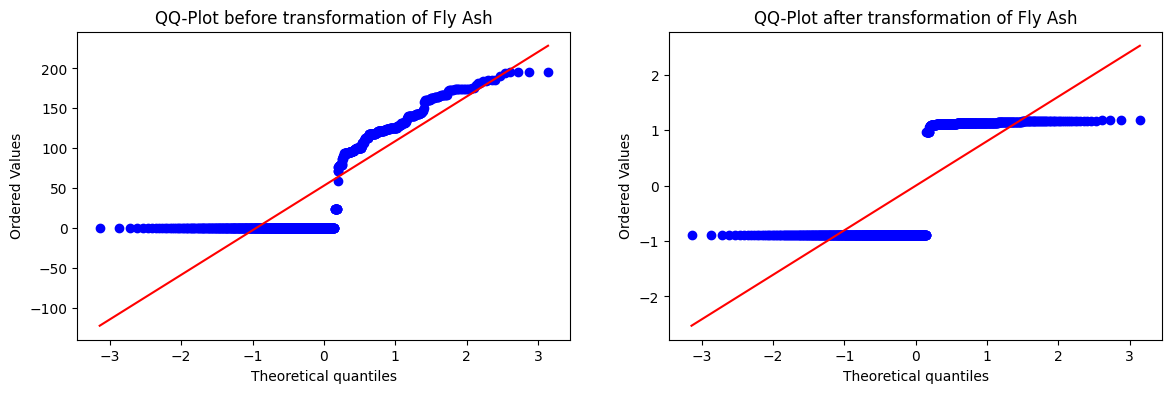

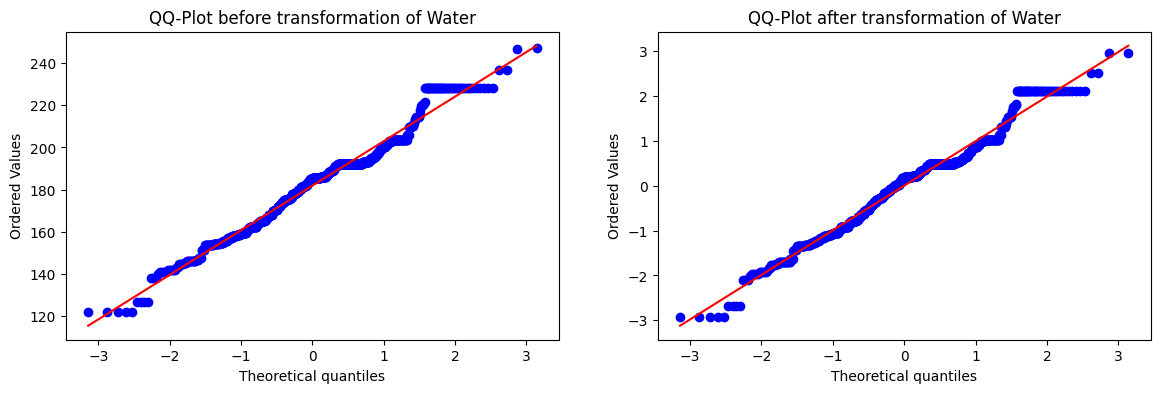

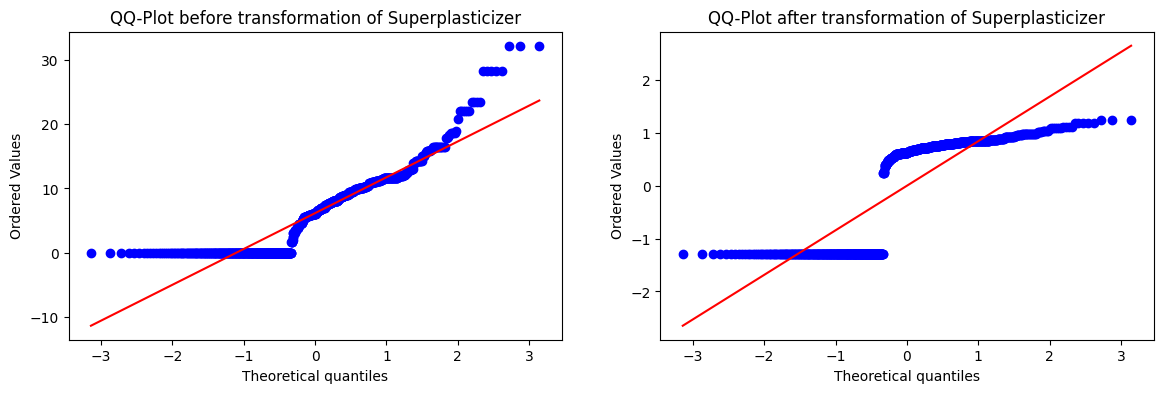

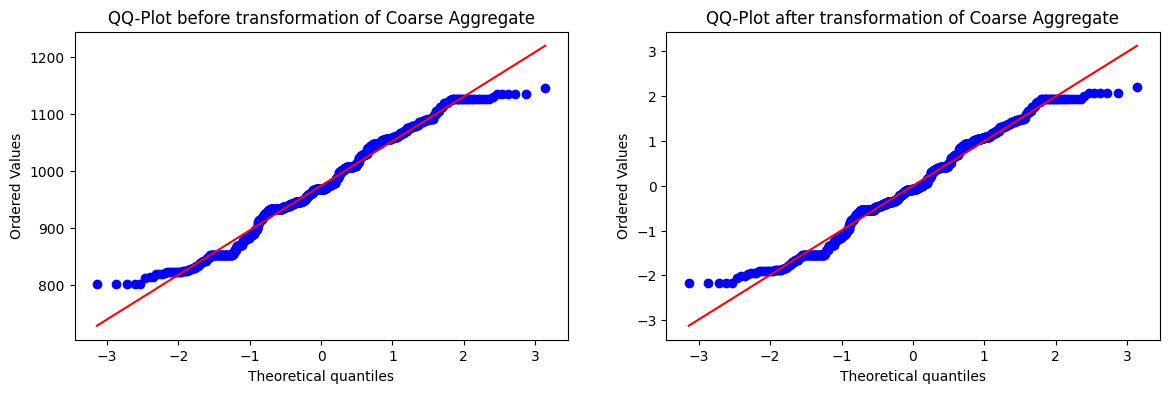

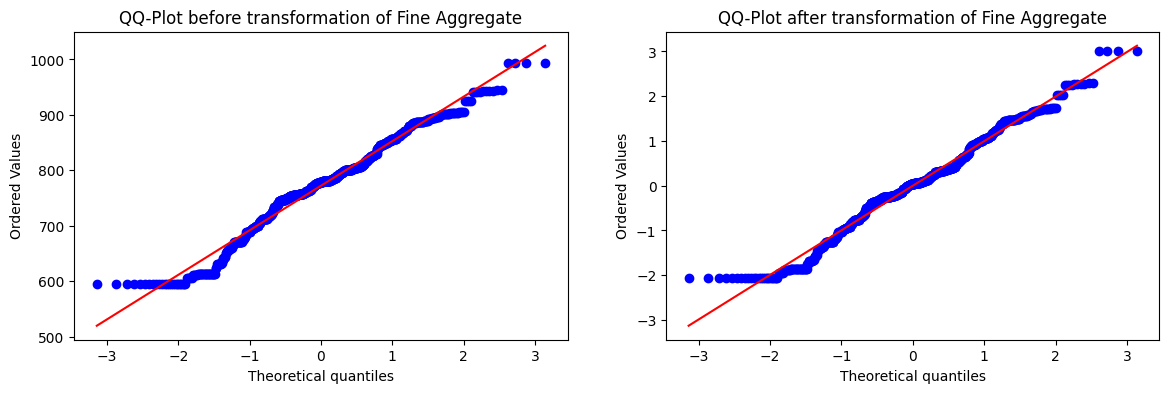

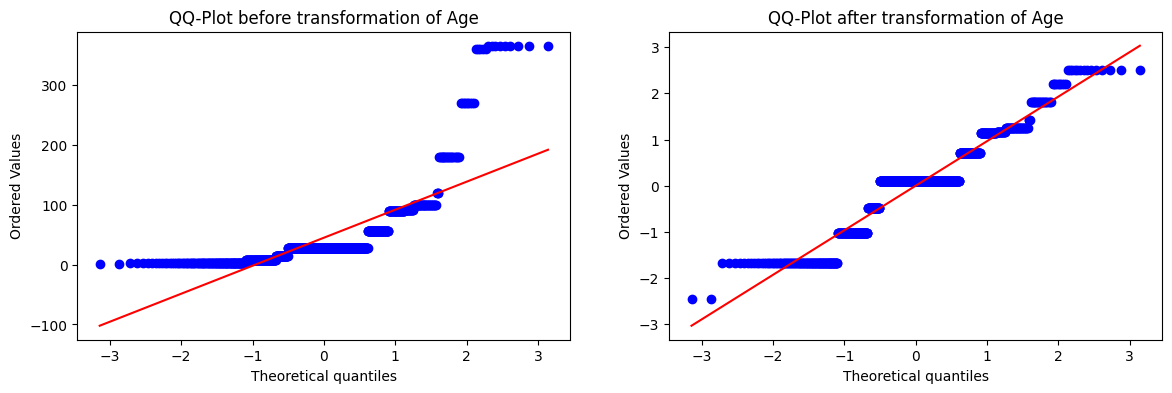

In [91]:
for cols in x_train_trans.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    scipy.stats.probplot(x_train[cols], dist='norm' ,plot=plt)
    plt.title(f"QQ-Plot before transformation of {cols}")

    plt.subplot(122)
    scipy.stats.probplot(x_train_trans[cols], dist='norm' ,plot=plt)
    plt.title(f"QQ-Plot after transformation of {cols}")

pdf distribution before and after transformation

C:\Users\Asus\AppData\Local\Temp\ipykernel_16144\235608506.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[cols])
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureW

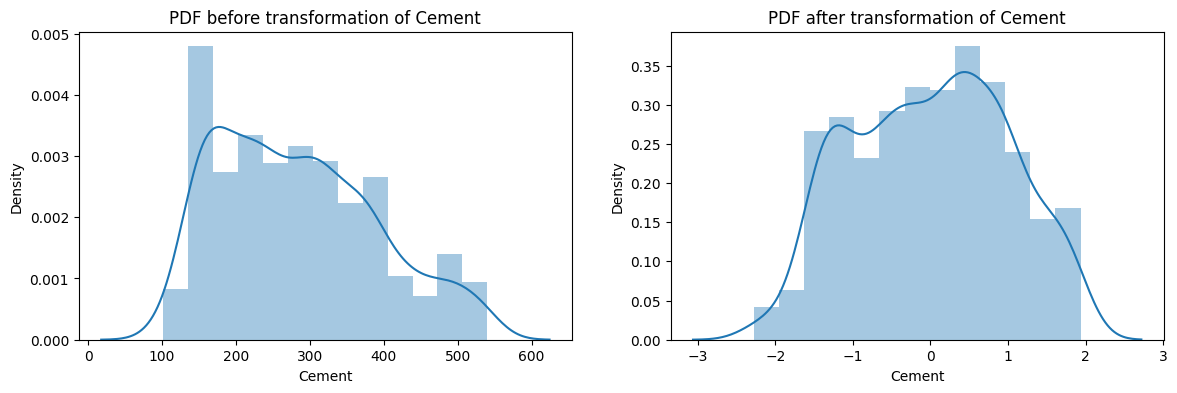

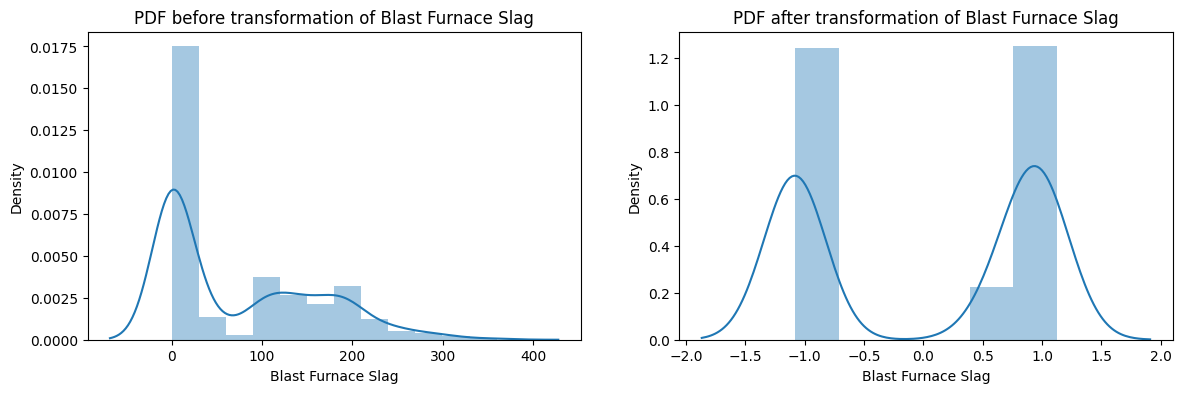

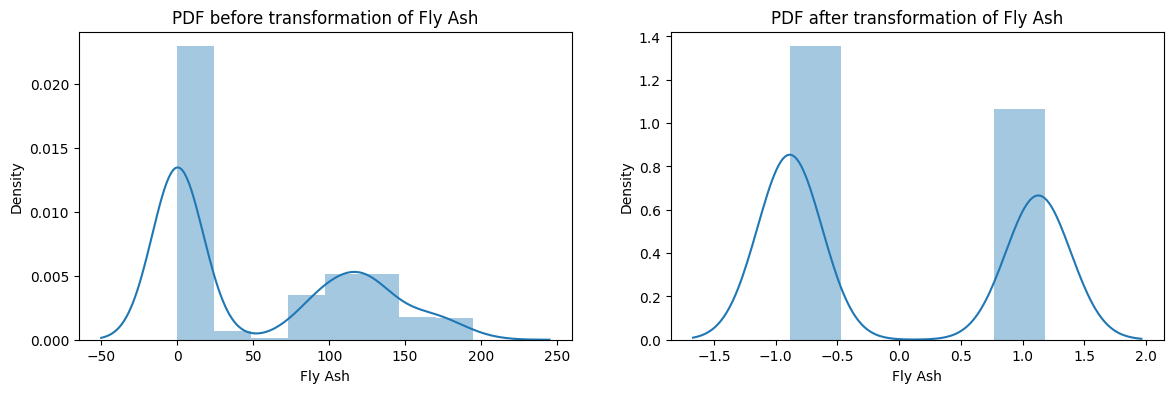

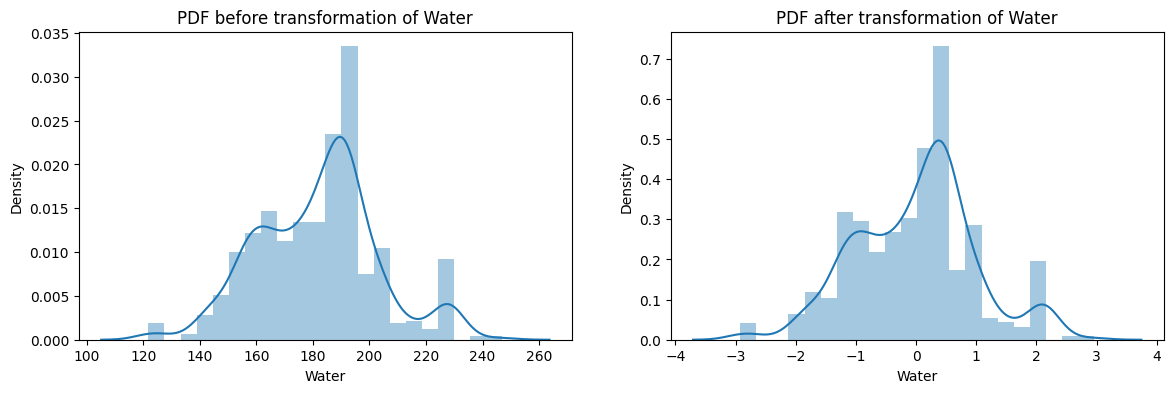

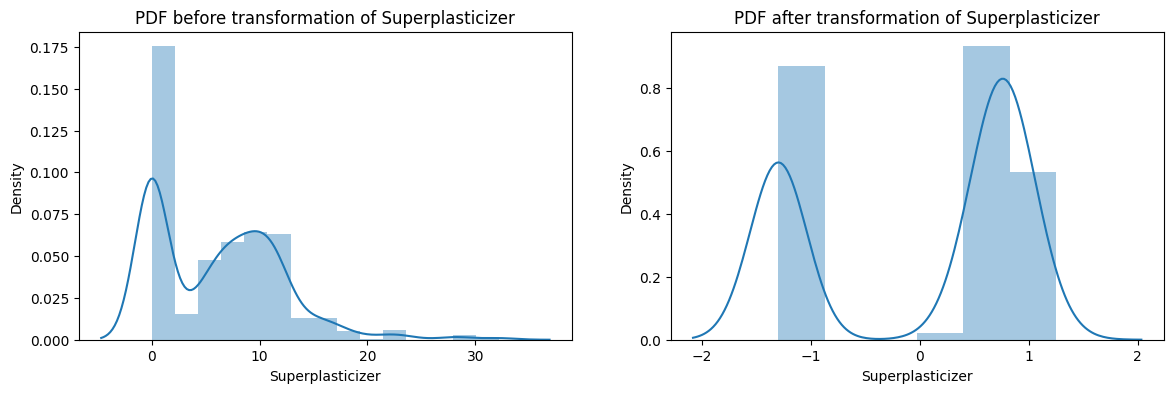

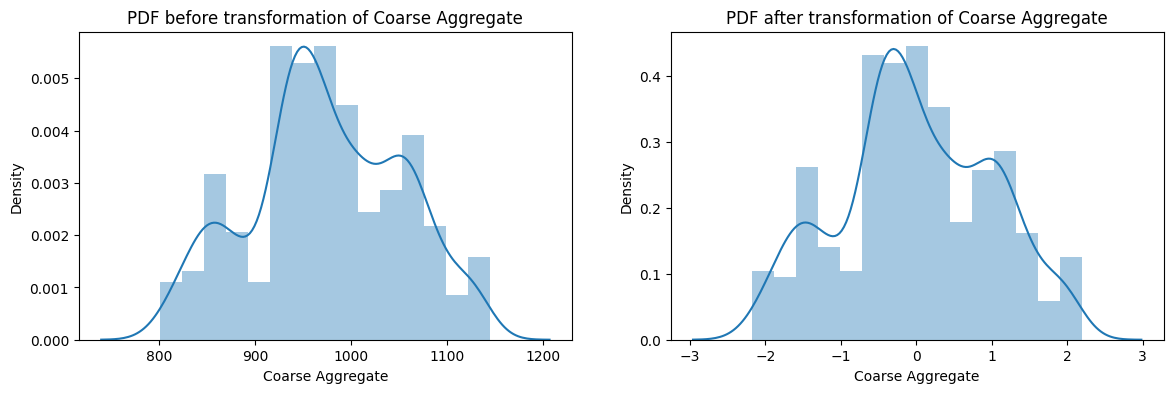

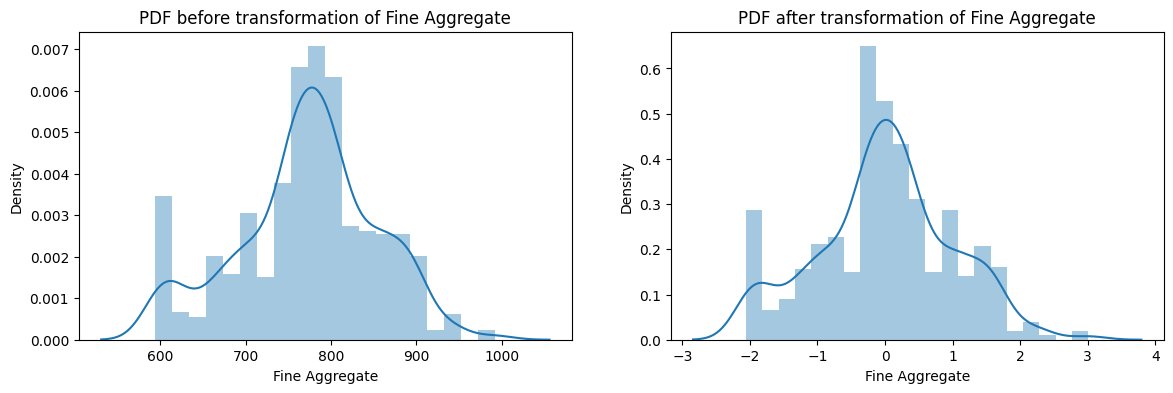

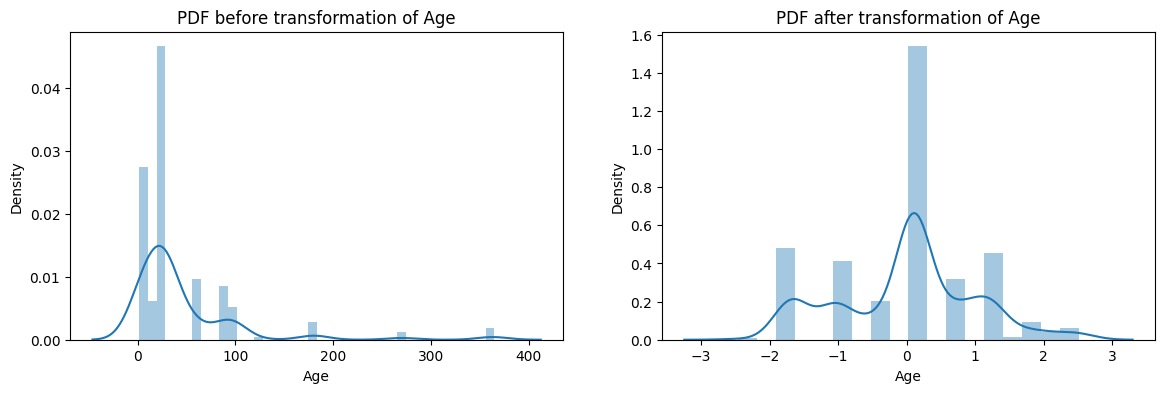

In [92]:
for cols in x_train_trans.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[cols])
    plt.title(f"PDF before transformation of {cols}")

    plt.subplot(122)
    sns.distplot(x_train_trans[cols])
    plt.title(f"PDF after transformation of {cols}")

# yeo johnson (any real value)

In [100]:
tnf2=PowerTransformer(method='yeo-johnson') # by default
# fit and transform 
x_train_trans1=tnf2.fit_transform(x_train)
x_test_trans1=tnf2.fit_transform(x_test)

In [101]:
pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_lambdas':tnf2.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [114]:
# converting again into dataframe
x_train_trans1=pd.DataFrame(x_train_trans1,columns=x_train.columns)
x_test_trans1=pd.DataFrame(x_test_trans1,columns=x_test.columns)

In [115]:
r5=LinearRegression()
r6=DecisionTreeRegressor()
r5.fit(x_train_trans,y_train)
r6.fit(x_train_trans,y_train)

y_pred5=r5.predict(x_test_trans1)
y_pred6=r6.predict(x_test_trans1)

In [116]:
print(r2_score(y_pred5,y_test))
print(r2_score(y_pred6,y_test))

0.7736454660206334
0.6983150167324508


qq plot before and after yeo johnson transformation

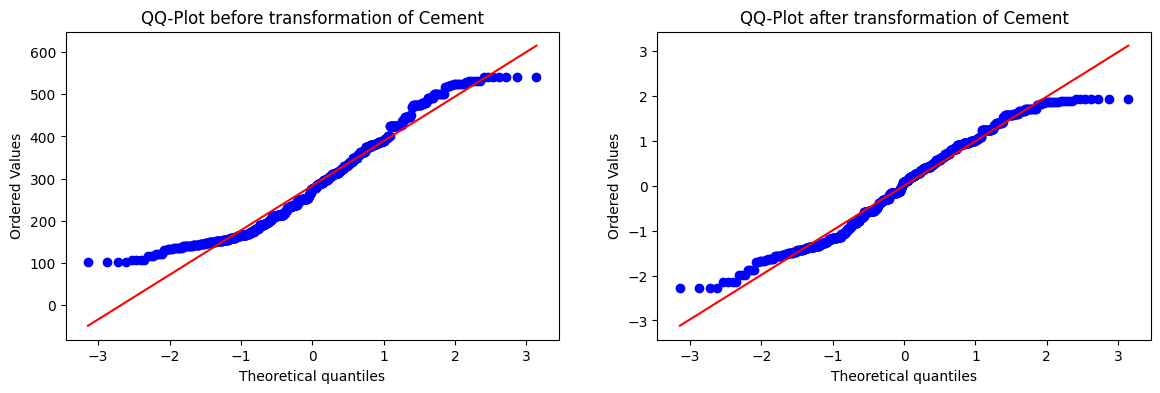

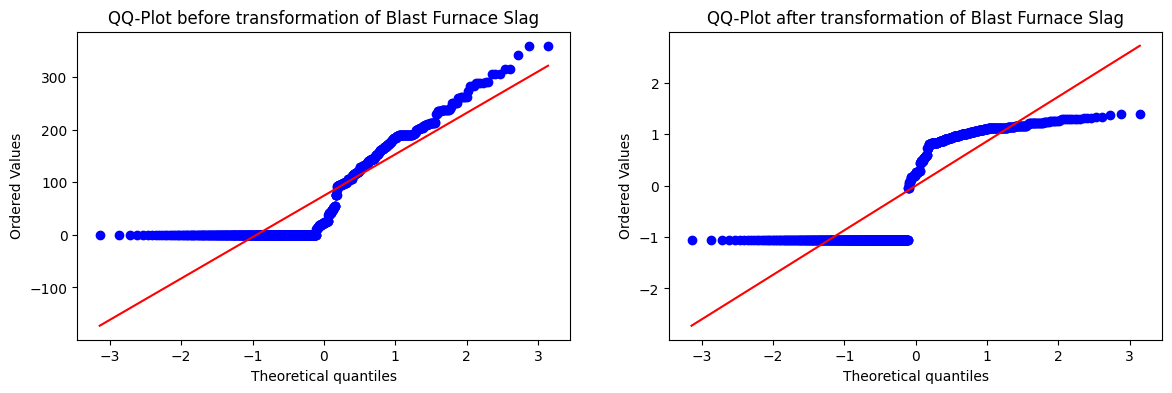

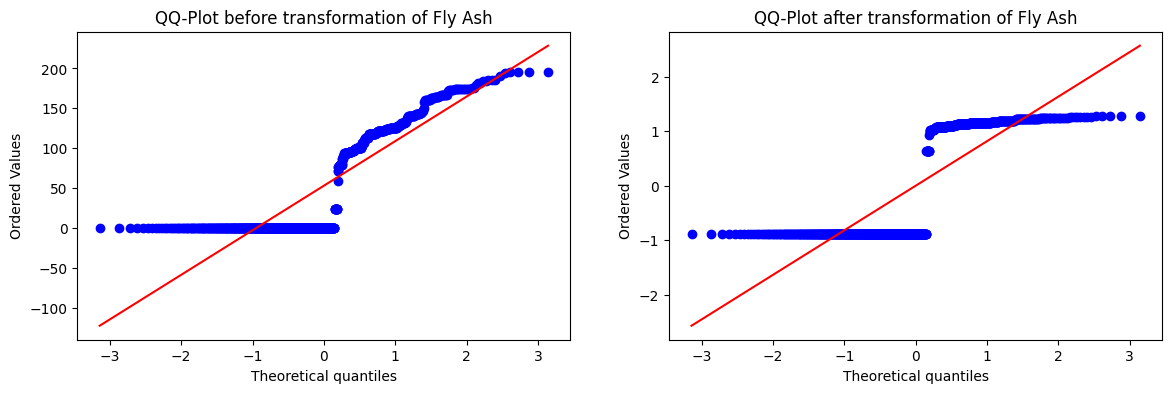

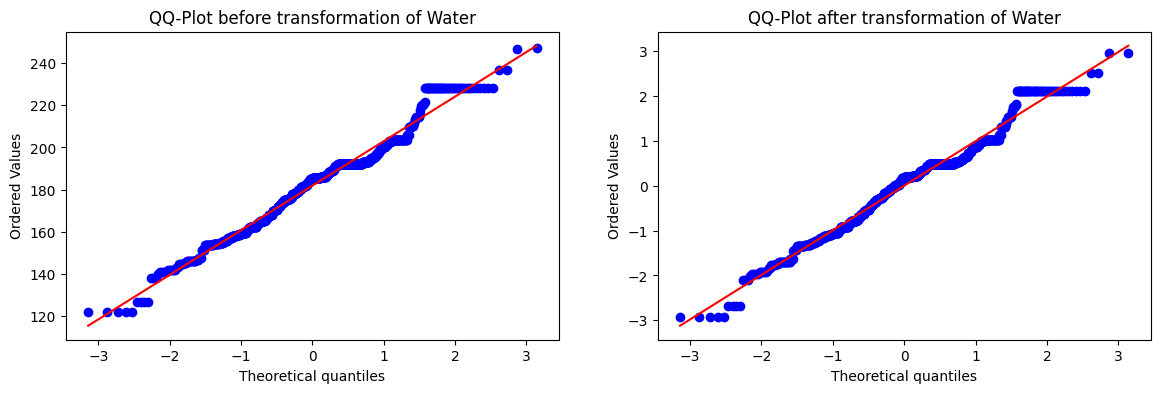

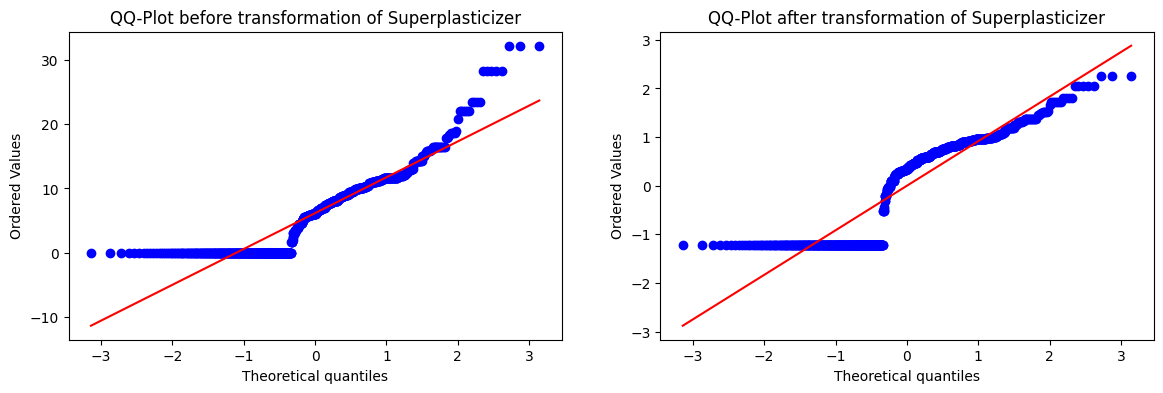

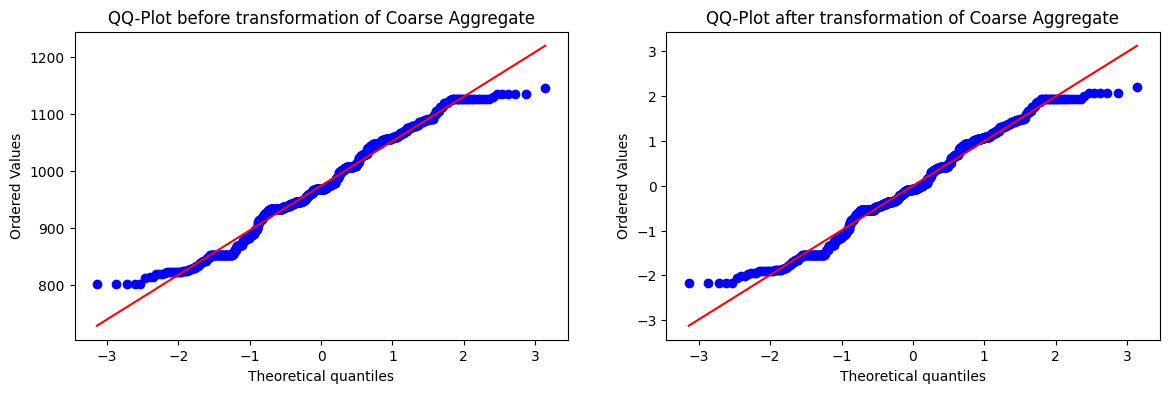

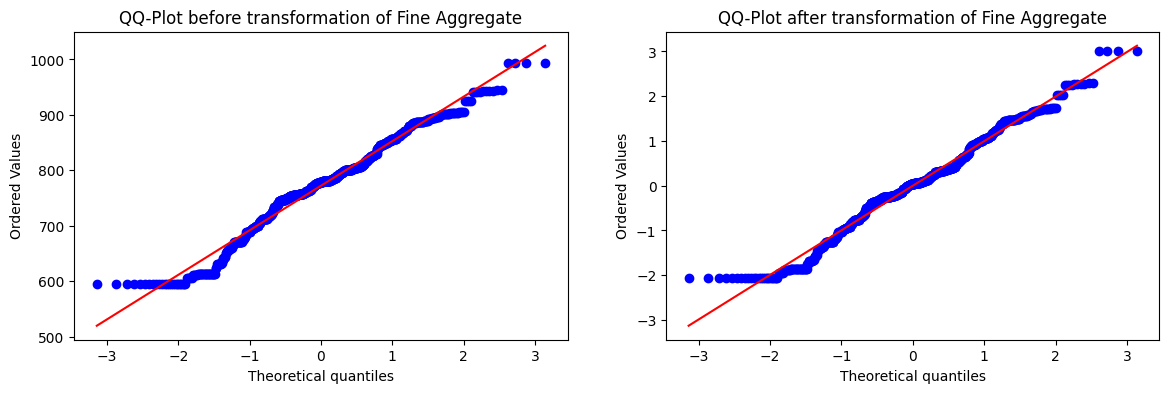

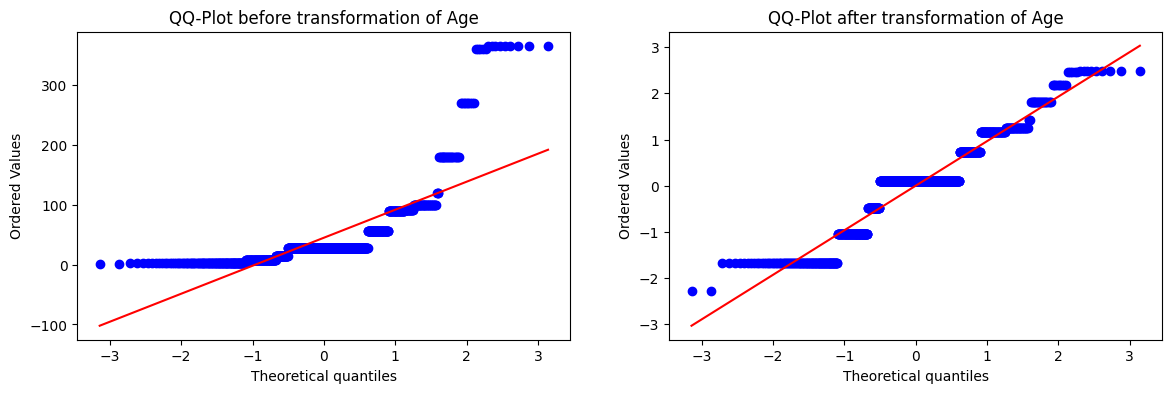

In [118]:
for cols in x_train_trans1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    scipy.stats.probplot(x_train[cols], dist='norm' ,plot=plt)
    plt.title(f"QQ-Plot before transformation of {cols}")

    plt.subplot(122)
    scipy.stats.probplot(x_train_trans1[cols], dist='norm' ,plot=plt)
    plt.title(f"QQ-Plot after transformation of {cols}")

pdf distribution before and after transformation

C:\Users\Asus\AppData\Local\Temp\ipykernel_16144\152569841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[cols])
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureW

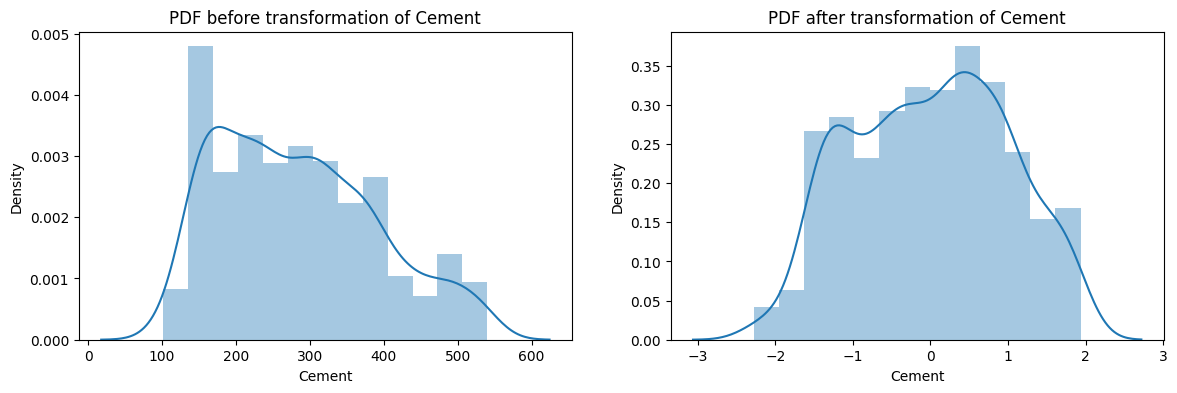

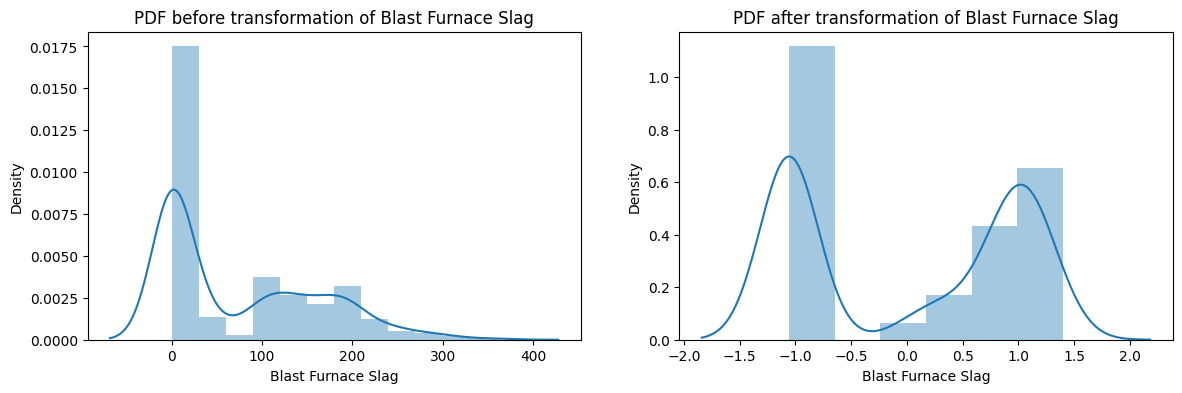

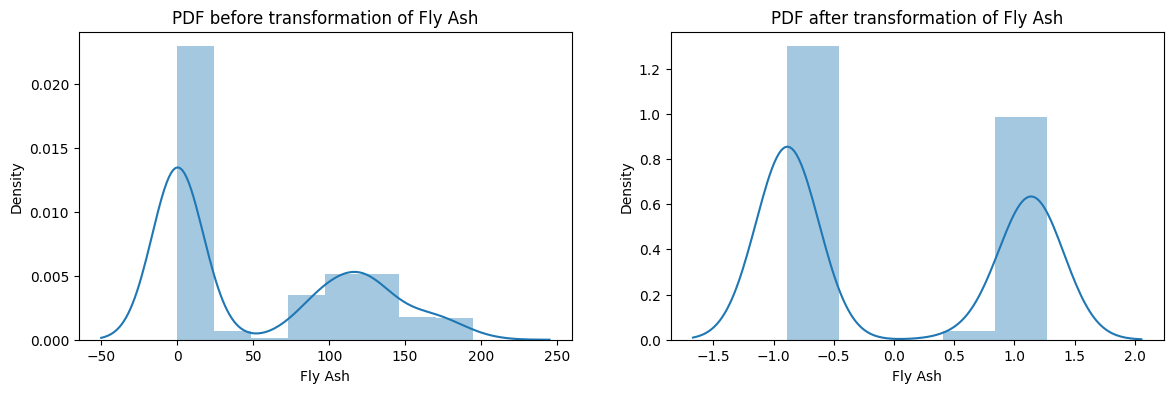

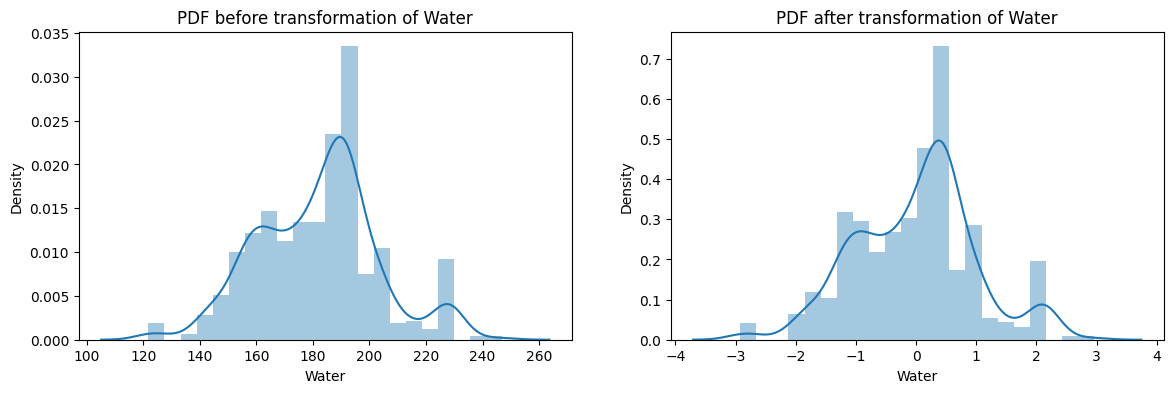

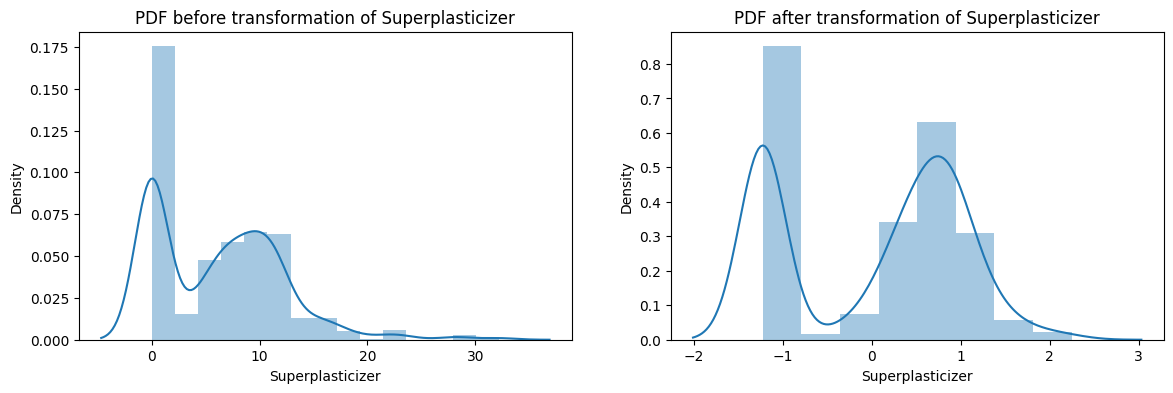

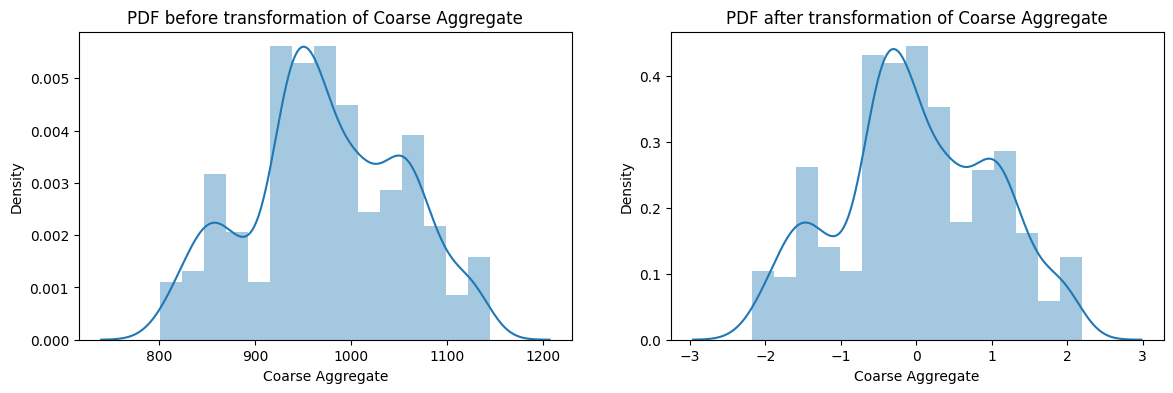

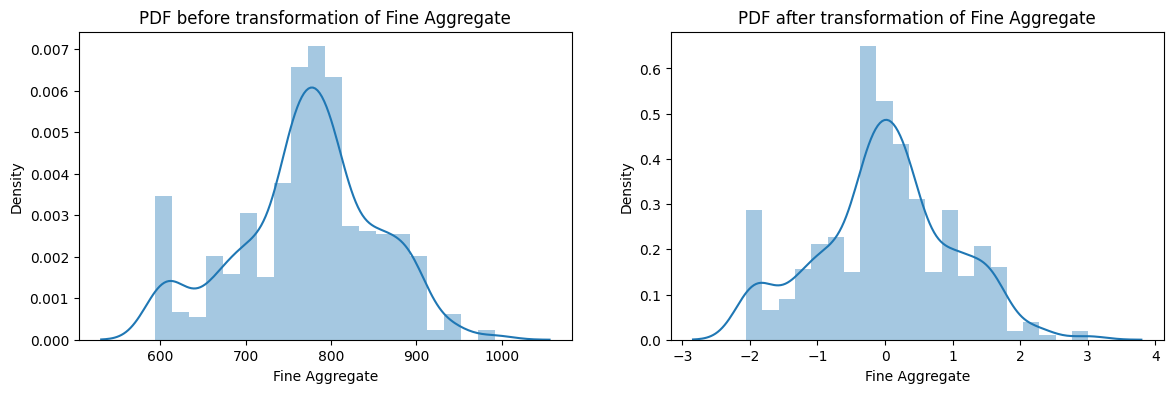

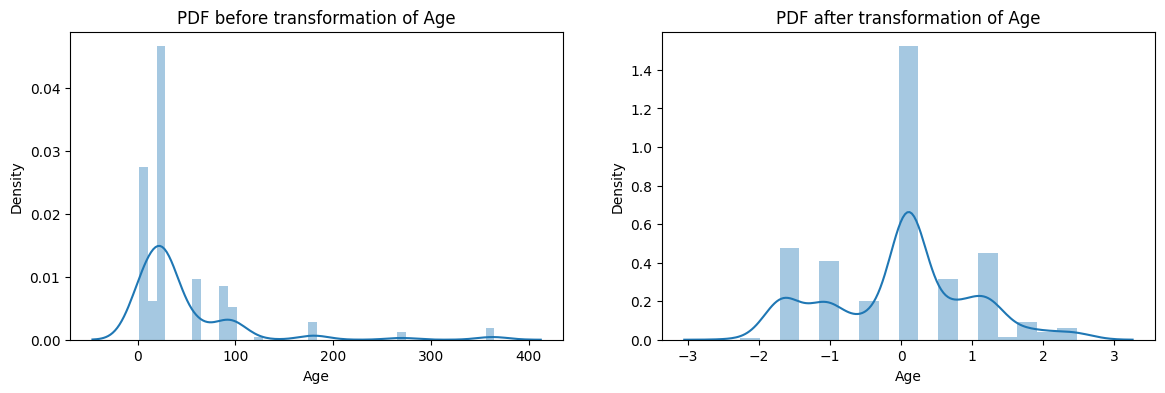

In [119]:
for cols in x_train_trans1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[cols])
    plt.title(f"PDF before transformation of {cols}")

    plt.subplot(122)
    sns.distplot(x_train_trans1[cols])
    plt.title(f"PDF after transformation of {cols}")